In [5]:
#import of libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data_audio_f_mean.csv')

In [7]:
df_test = df.iloc[:, 5:19]
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)
df_test = df_test.astype({"target": int})
y = df_test['target']
df_test = df_test.drop('target', 1)

In [20]:
df_test.head()

,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency,tonnetz
0,0.095985,0.032898,0.598389,0.335931,0.251026,-4.151321,0.007211,1391.829492,1770.435764,23.832949,0.000225,5660.559507,0.065789
1,0.083133,0.034875,0.549378,0.386137,0.243251,-4.259758,0.007428,1127.738463,1574.488895,24.478842,0.000103,5120.156046,0.024099
2,0.120339,0.027383,0.776584,0.321334,0.255388,-3.331495,0.006812,1804.463937,1813.068302,22.781830,0.000449,5696.131759,0.076063
3,0.095124,0.046161,0.757323,0.373222,0.246073,-3.485691,0.008451,893.927245,1230.738677,21.108826,0.000061,3657.546948,0.044300
4,0.132093,0.023357,0.862880,0.295585,0.250950,-3.539014,0.006496,2297.372342,1980.079305,22.923389,0.000795,6358.914758,0.077573


In [8]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.3,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(37839, 13) (37839,)
(16218, 13) (16218,)


In [9]:
# Scale the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[-0.75259807, -0.70132091, -0.88301204, ...,  0.02100727,
         0.85888861,  1.53901887],
       [-1.37427422, -1.02184999,  0.5206427 , ..., -0.73174977,
        -1.67732932, -0.78779415],
       [ 0.11584301,  1.324338  ,  0.86883593, ..., -1.17428975,
        -2.21764812, -0.1054937 ],
       ...,
       [ 0.44183367,  1.63590116,  0.55654429, ..., -1.08476386,
        -1.46436344, -0.25394486],
       [ 2.06419266,  0.57257659,  0.28834697, ...,  0.84528823,
         0.7097828 ,  0.21754029],
       [ 1.38794229,  0.86363985,  1.14577332, ...,  0.16160746,
         0.26263038,  0.39783136]])

In [11]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Declare an instance of it
classifier = LogisticRegression(solver='lbfgs')

# Fit the model
classifier.fit(X_train, Y_train)

LogisticRegression()

In [13]:
# Evaluate the model
classifier.score(X_test, Y_test)

0.8349981502034776

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     13218
           1       0.87      0.13      0.22      3000

    accuracy                           0.83     16218
   macro avg       0.85      0.56      0.56     16218
weighted avg       0.84      0.83      0.78     16218



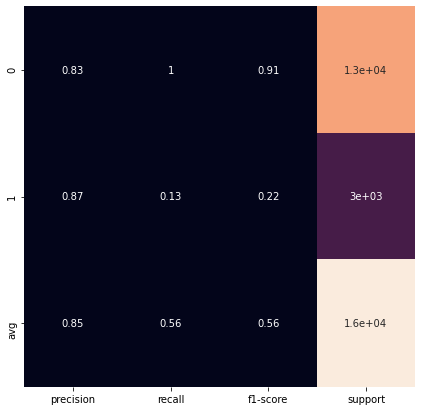

In [18]:
from sklearn.metrics import precision_recall_fscore_support

def plot_classification_report(y_tru, y_prd, figsize=(7, 7), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sn.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(Y_test, y_pred)